# Enhancing Breast Cancer Diagnosis: A Comparison of Machine Learning Models and BI-RADS for Tumour Classification

## Abstract
Breast cancer is a major cause of mortality among the global female population, and early diagnosis is imperative for enhancing patient prognoses. Mammography is the most widely utilised screening modality; however, it poses challenges in accurately interpreting and classifying lesions. This article proposes a comprehensive approach to the classification of mammographic masses using supervised machine learning techniques. A dataset comprising 961 cases (516 benign and 445 malignant) was utilised to implement and evaluate three models - Logistic Regression, Random Forest and Support Vector Machine (SVM). The study focused on analysing five main characteristics - BI-RADS, age, shape, margin and density. Following a thorough pre-processing phase incorporating Z-score normalisation and the management of missing values, as well as hyperparameter optimisation, the SVM was identified as the most effective model. The SVM attained an accuracy of 0.848 and an F1-Score of 0.823, demonstrating a substantial improvement over the BI-RADS model alone, which achieved an accuracy of 0.807 and an F1-Score of 0.763. The area under the curve (AUC) of the ROC curve analysis was found to be 0.91 for the SVM, in comparison to 0.82 for the BI-RADS model. The findings of this study indicate that the incorporation of machine learning models has the potential to enhance the efficacy of conventional mammogram analysis, thereby leading to a reduction in the number of unnecessary biopsies and an improvement in the accuracy of breast cancer diagnosis.

## 2. Motivation
The primary motivation behind this study is the pursuit of enhanced diagnostic accuracy in breast cancer detection. Early diagnosis is critical in reducing the morbidity and mortality associated with this disease. By constructing and optimising a machine learning pipeline, we aim to:

Improve the accuracy and other performance metrics in tumour detection.
Assist healthcare professionals in interpreting diagnostic images.
Ensure explainability and reproducibility through graphical analyses and cross-validation.
The following sections present a consolidated approach, including a robust preprocessing pipeline, training/validation/refinement of models, and post-processing with a variety of metrics and visualisations.

### Description of the Dataset
In this study, we utilised the Mammographic Masses dataset, available from the UCI Machine Learning Repository, accessible at http://archive.ics.uci.edu/dataset/161/mammographic+mass. This dataset was originally developed to aid in the diagnosis of breast lesions and consists of 961 cases, of which 516 are benign and 445 are malignant. Each instance in the dataset includes the following variables:

* BI-RADS: A categorical assessment of the mammogram according to the BI-RADS (Breast Imaging Reporting and Data System) scale, ranging from 0 to 5.
* Age: The age of the patient.
* Shape: The shape of the lesion (1 = round, 2 = oval, 3 = lobulated, 4 = irregular).
* Margin: The margin of the lesion (1 = circumscribed, 2 = microlobulated, 3 = obscured, 4 = undefined, 5 = spiculated).
* Density: The density of the lesion (1 to 4).
* Severity: The target variable indicating whether the lesion is benign (0) or malignant (1).

This dataset is a valuable resource for the training and evaluation of machine learning models aimed at improving breast cancer diagnosis.

## 3. Pipeline Final

### 3.1 Importações e Carregamento dos Dados

Descrição do Dataset:
          BI-RADS         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

Valores Ausentes:
BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64


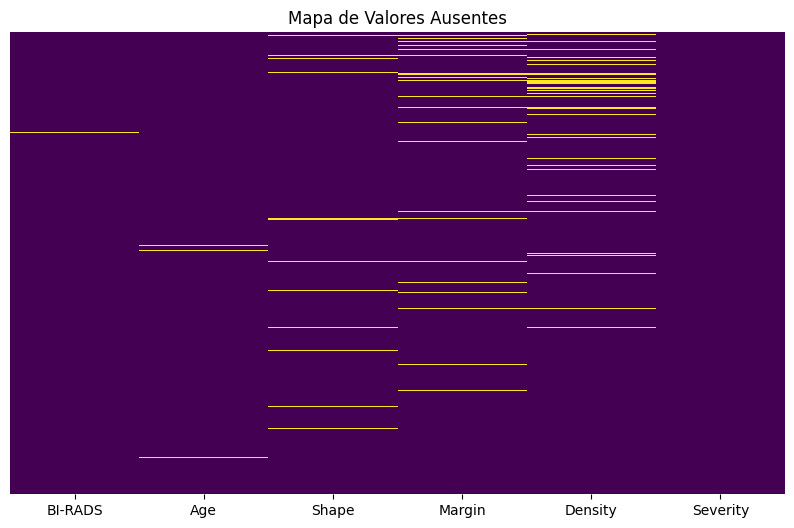

In [ ]:
# ============================
# Célula 1: Importar Bibliotecas e Carregar Dados
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ============================
# Carregar o dataset
# ============================
data = pd.read_csv('mammographic_masses.data', header=None,
                   names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'],
                   na_values=['?'])

# Descrição do Dataset
print("Descrição do Dataset:")
print(data.describe())

# Verificar valores ausentes
print("\nValores Ausentes:")
print(data.isnull().sum())

# Visualizar valores ausentes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()


Como verificar temos valores ausentes, pelo que devemos tratar deles, pelo que a estratégia simples e robusta para lidar com os valores em falta foi:
* Para **variáveis numéricas** como Age e BI-RADS, os valores em falta foram imputados com a mediana da variável correspondente. A mediana é menos sensível a valores atípicos e preserva a tendência central dos dados.
* Para **variáveis categóricas** como Shape, Margin e Density, os valores em falta foram imputados com a moda (valor mais frequente). A escolha da moda minimiza as alterações à distribuição original das categorias.

Esta abordagem foi escolhida pela sua simplicidade e eficácia em situações em que os valores em falta não seguem padrões sistemáticos.

### 3.2 Análise Exploratória e Tratamento Inicial de Valores Ausentes

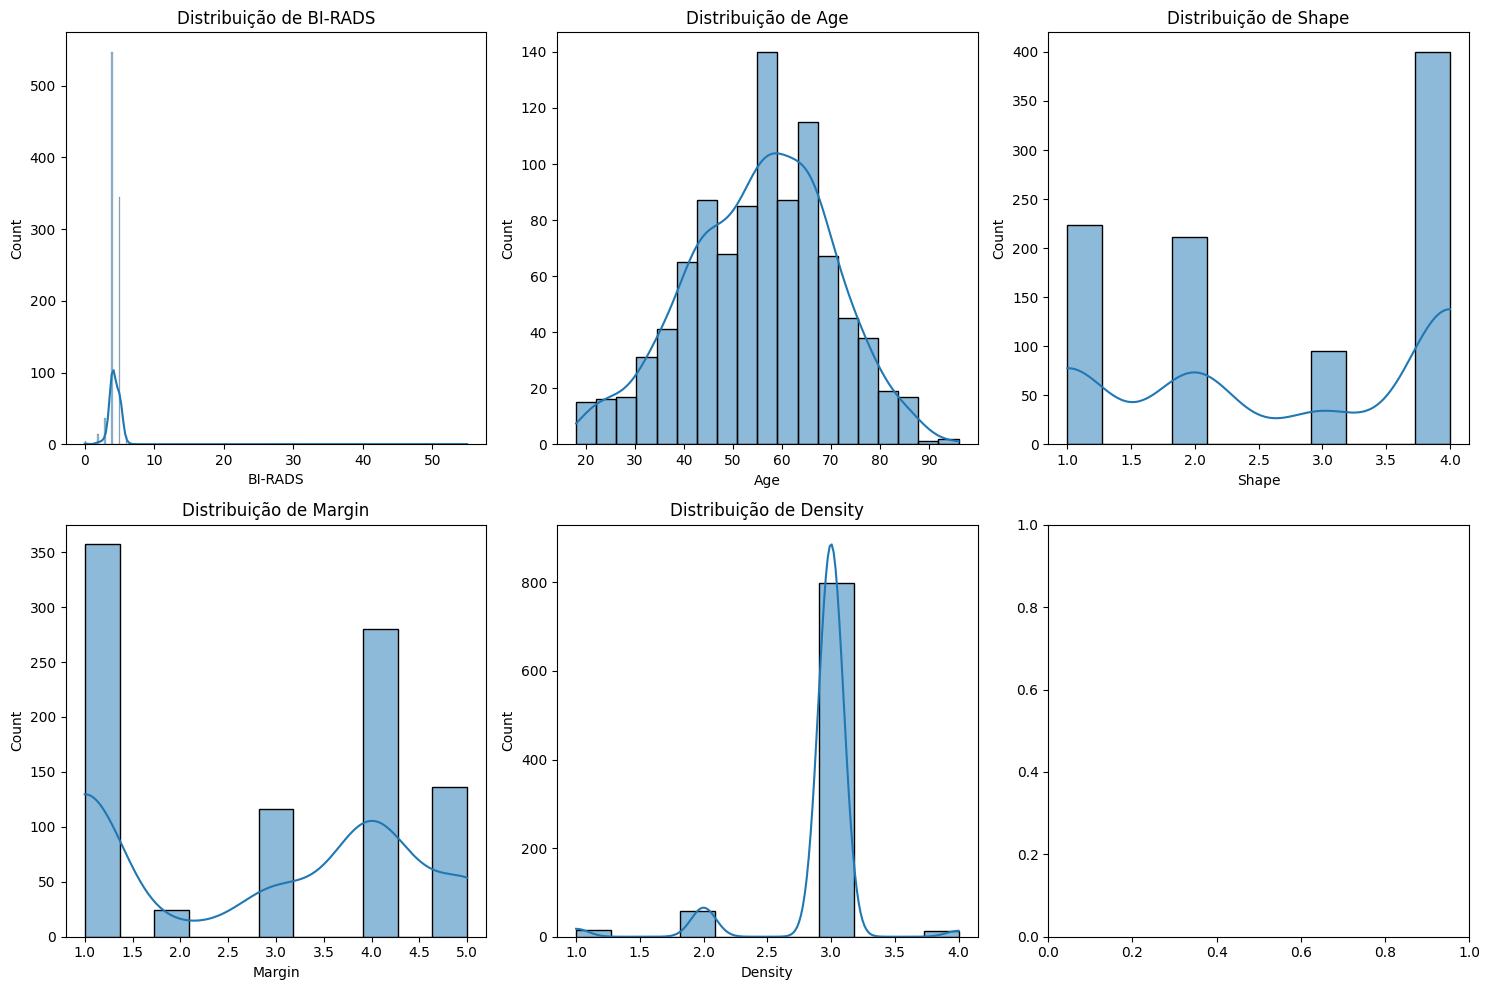

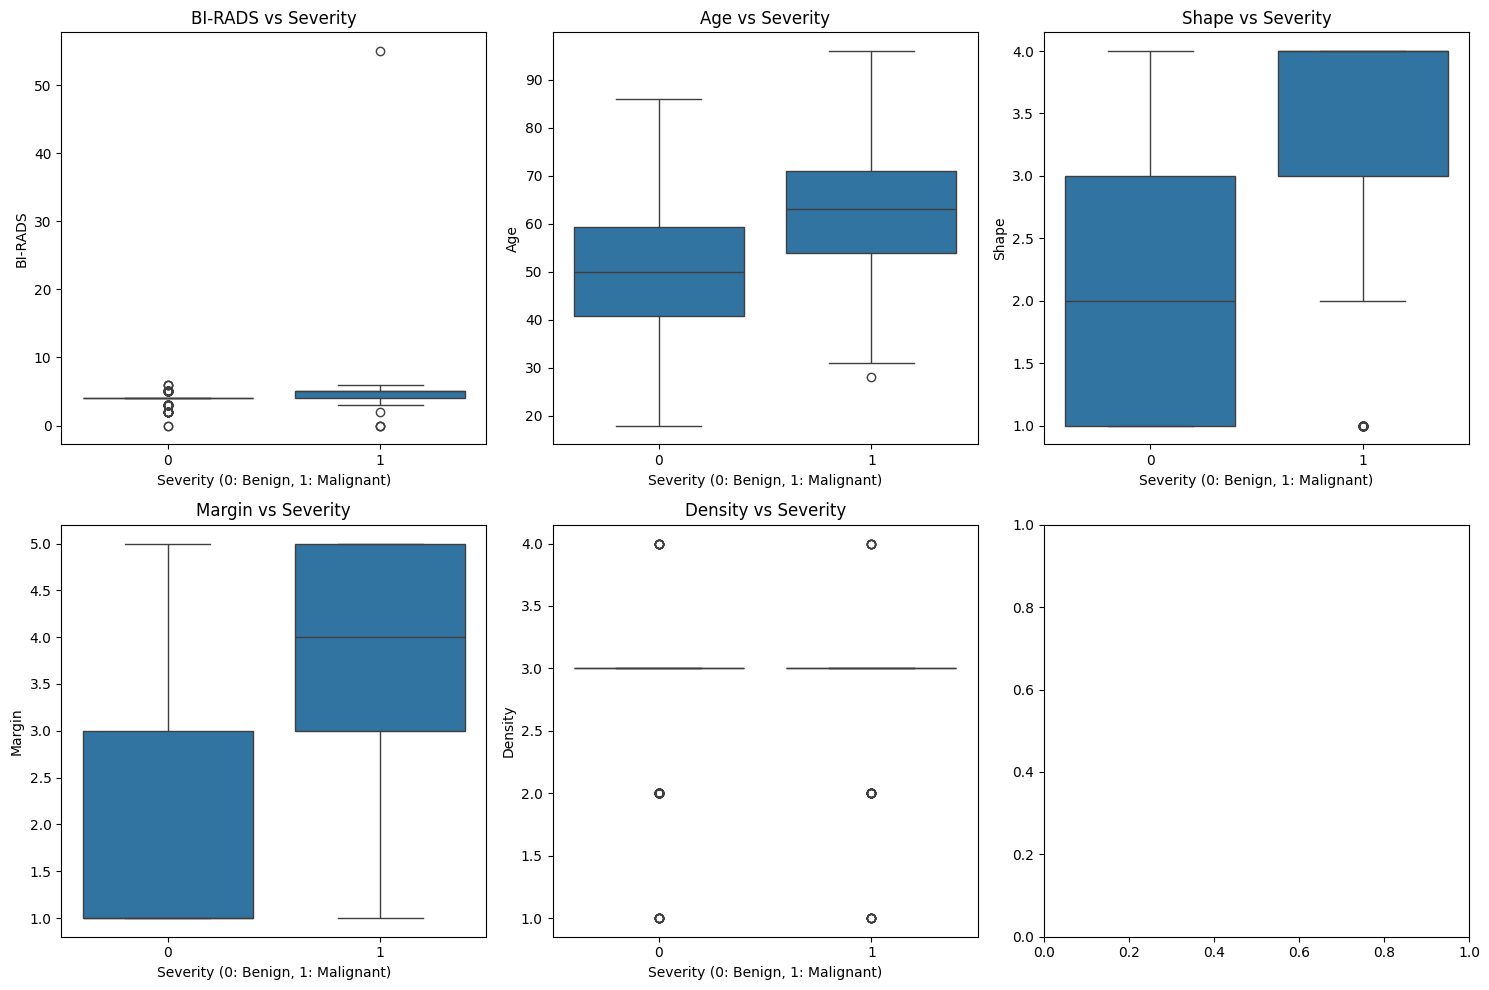

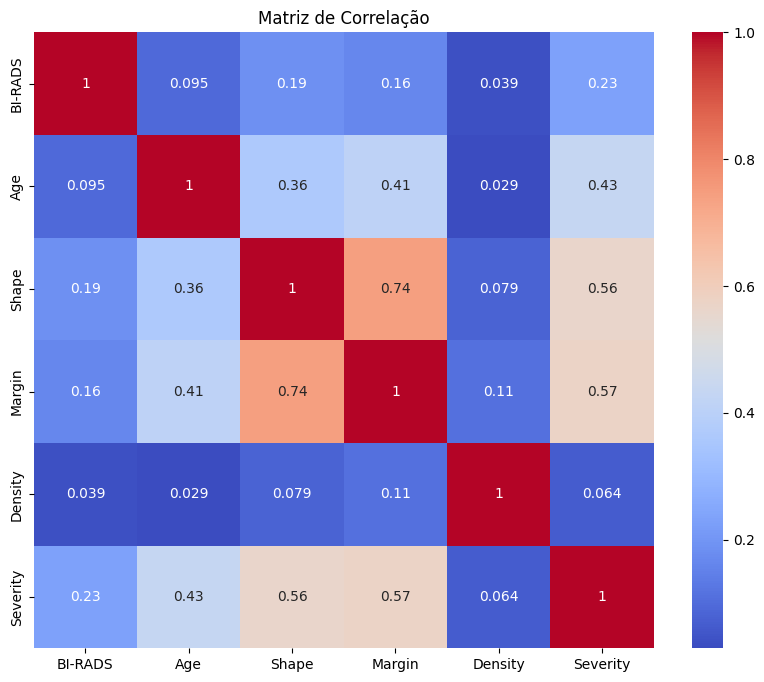


Valores Ausentes Após Tratamento Inicial:
BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


<ipython-input-2-0187b0c32330>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BI-RADS'].fillna(data['BI-RADS'].median(), inplace=True)
<ipython-input-2-0187b0c32330>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# ============================
# Célula 2: Análise Exploratória e Tratamento Inicial
# ============================

# Análise Exploratória: Distribuição das features
features = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {feature}')

plt.tight_layout()
plt.show()

# Visualizar relação entre cada feature e a variável-alvo 'Severity'
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(x='Severity', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Severity')
    axes[i].set_xlabel('Severity (0: Benign, 1: Malignant)')

plt.tight_layout()
plt.show()

# Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Tratamento inicial e manual de valores ausentes
# Aqui, vamos substituir valores ausentes pela mediana (numéricas) ou moda (categóricas)
data['BI-RADS'].fillna(data['BI-RADS'].median(), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Shape'].fillna(data['Shape'].mode()[0], inplace=True)
data['Margin'].fillna(data['Margin'].mode()[0], inplace=True)
data['Density'].fillna(data['Density'].mode()[0], inplace=True)

print("\nValores Ausentes Após Tratamento Inicial:")
print(data.isnull().sum())


### 3.3. Divisão de Dados e Criação de Pipelines para Modelos Diversos

In [ ]:
# ============================
# Célula 3: Divisão de Dados e Definição de Modelos
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Definir X e y
X = data.drop('Severity', axis=1)
y = data['Severity']

# Dividir em treino, validação, teste (70% treino, 15% val, 15% teste)
# Divisão inicial: 70% treino e 30% temporário
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Divisão do temporário em 15% val e 15% teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nTamanho dos conjuntos:")
print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)

# Criar um preprocessor no estilo ColumnTransformer
numeric_features = ['Age']
categorical_features = ['BI-RADS', 'Shape', 'Margin', 'Density']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Modelos básicos (Pipelines com pré-processamento + modelo)
logistic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

random_forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

# Definir grids de parâmetros
param_grid_logistic = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__gamma': ['scale', 'auto']
}

models = {
    'Logistic Regression': (logistic_model, param_grid_logistic),
    'Random Forest': (random_forest_model, param_grid_rf),
    'SVM': (svm_model, param_grid_svm)
}

best_models = {}

# Realizar GridSearchCV para cada modelo
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"\nMelhores parâmetros para {name}:")
    print(grid_search.best_params_)
    print(f"Melhor pontuação de validação (F1): {grid_search.best_score_:.3f}")

# Avaliar com cross-validation
for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"\n{name} - F1 médio na validação cruzada: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")



Tamanho dos conjuntos:
Treino: (672, 5)
Validação: (144, 5)
Teste: (145, 5)

Melhores parâmetros para Logistic Regression:
{'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Melhor pontuação de validação (F1): 0.811

Melhores parâmetros para Random Forest:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Melhor pontuação de validação (F1): 0.811

Melhores parâmetros para SVM:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Melhor pontuação de validação (F1): 0.810

Logistic Regression - F1 médio na validação cruzada: 0.811 (+/- 0.093)

Random Forest - F1 médio na validação cruzada: 0.811 (+/- 0.055)

SVM - F1 médio na validação cruzada: 0.810 (+/- 0.075)


A divisão do conjunto de dados foi realizada em três subconjuntos: treino (672 instâncias), validação (144 instâncias) e teste (145 instâncias). Para garantir a qualidade do modelo, foi aplicado um pré-processamento rigoroso, incluindo a imputação de valores ausentes e a normalização das variáveis. As variáveis numéricas foram normalizadas utilizando o StandardScaler, e as variáveis categóricas foram tratadas com imputação de valores mais frequentes e codificação OneHot. Três modelos de aprendizagem supervisionada foram avaliados: Regressão Logística, Random Forest e Máquina de Vetores de Suporte (SVM). Cada modelo foi otimizado utilizando GridSearchCV, e os melhores parâmetros encontrados para cada modelo foram a regularização de C=1 para a Regressão Logística, a profundidade máxima de 10 e 50 estimadores para o Random Forest, e C=1, gamma=scale e kernel=rbf para o SVM.

Os resultados de validação indicaram que os modelos de Regressão Logística e Random Forest apresentaram um desempenho ligeiramente superior, com uma pontuação F1 de 0.811, enquanto o SVM obteve uma pontuação F1 de 0.810. A validação cruzada confirmou que todos os modelos tiveram um desempenho consistente, com médias de F1 de 0.811 para a Regressão Logística e o Random Forest, e 0.810 para o SVM. Estes resultados sugerem que, apesar das diferenças mínimas, todos os modelos são eficazes na classificação das massas mamográficas, com o Random Forest e a Regressão Logística ligeiramente mais robustos em termos de estabilidade no desempenho.

### 3.4. Avaliação Final nos Conjuntos de Validação e Métricas


Comparação de desempenho no conjunto de validação:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.847222   0.848485  0.823529  0.835821  0.917473
Random Forest        0.847222   0.859375  0.808824  0.833333  0.906057
SVM                  0.847222   0.870968  0.794118  0.830769  0.910507


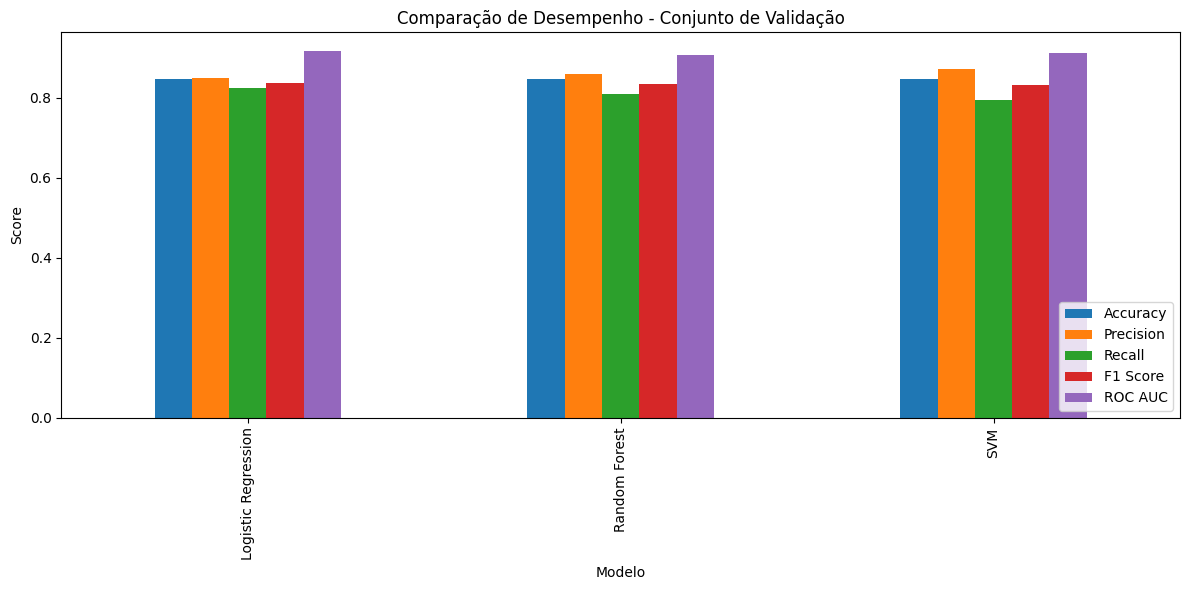

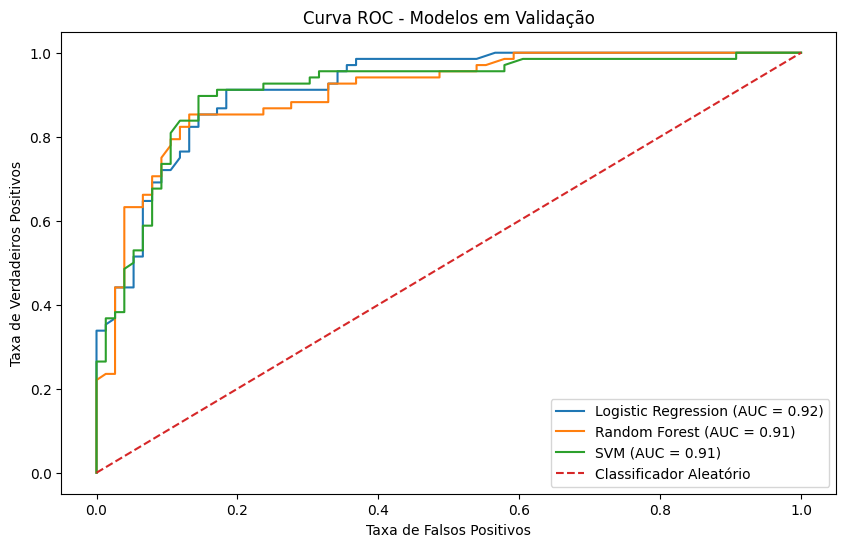

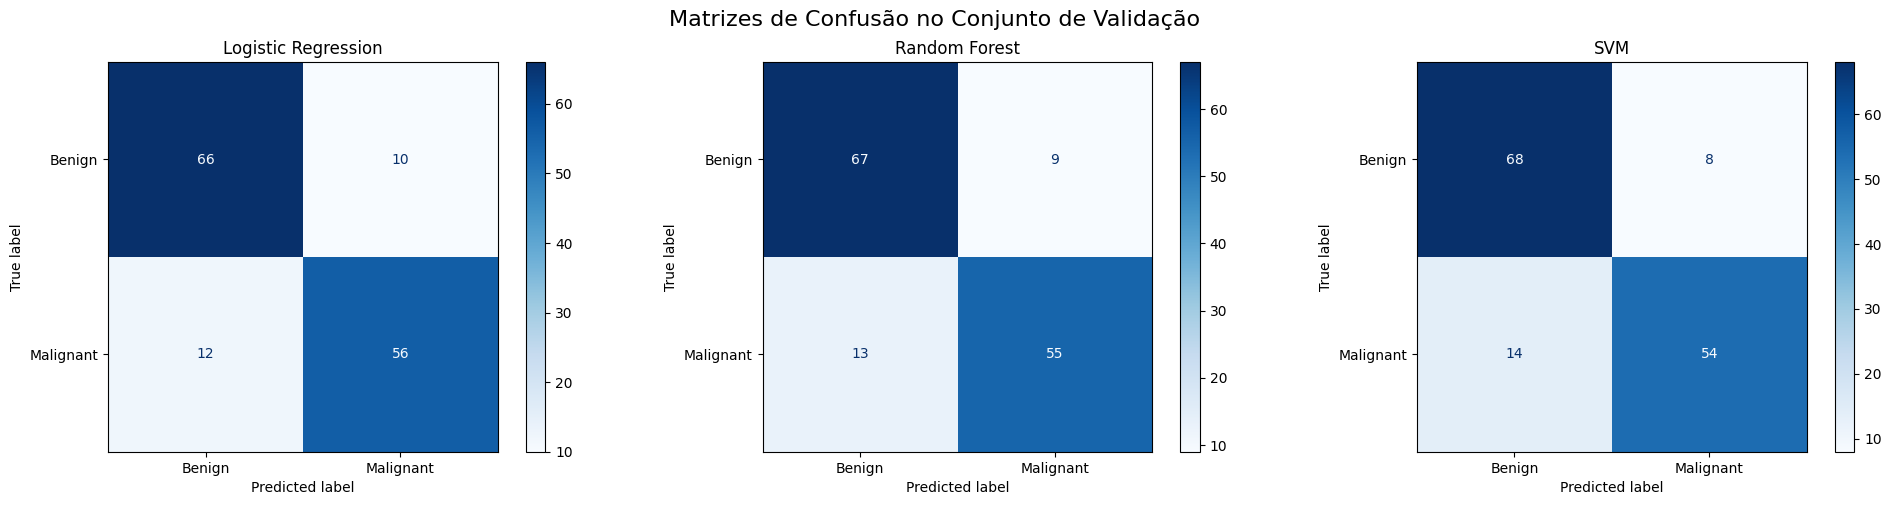


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      Benign       0.85      0.87      0.86        76
   Malignant       0.85      0.82      0.84        68

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144


Classification Report - Random Forest:
              precision    recall  f1-score   support

      Benign       0.84      0.88      0.86        76
   Malignant       0.86      0.81      0.83        68

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144


Classification Report - SVM:
              precision    recall  f1-score   support

      Benign       0.83      0.89      0.86        76
   Malignant       0.87      0.79      0.83        68

    accuracy                           0.85       144
   macro avg

In [ ]:
# ============================
# Célula 4: Avaliação em Conjunto de Validação e Métricas
# ============================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, classification_report

results = {}
for model_name, model in best_models.items():
    val_preds = model.predict(X_val)
    val_probs = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_val)

    results[model_name] = {
        'Accuracy': accuracy_score(y_val, val_preds),
        'Precision': precision_score(y_val, val_preds),
        'Recall': recall_score(y_val, val_preds),
        'F1 Score': f1_score(y_val, val_preds),
        'ROC AUC': roc_auc_score(y_val, val_probs)
    }

performance_df = pd.DataFrame(results).T
print("\nComparação de desempenho no conjunto de validação:")
print(performance_df)

# Visualizar métricas
performance_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparação de Desempenho - Conjunto de Validação")
plt.ylabel("Score")
plt.xlabel("Modelo")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(10, 6))
for model_name, model in best_models.items():
    val_probs = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val, val_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_val, val_probs):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelos em Validação')
plt.legend()
plt.show()

# Matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Matrizes de Confusão no Conjunto de Validação", fontsize=16)

for ax, (model_name, model) in zip(axes, best_models.items()):
    val_preds = model.predict(X_val)
    cm = confusion_matrix(y_val, val_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f"{model_name}")

plt.tight_layout()
plt.show()

# Classification report
for model_name, model in best_models.items():
    val_preds = model.predict(X_val)
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_val, val_preds, target_names=['Benign', 'Malignant']))


A avaliação dos modelos no conjunto de validação revelou desempenhos consistentes, com todos os modelos apresentando uma acurácia de 0.85. A Regressão Logística obteve o melhor valor de precisão (0.85) e recall (0.82), resultando num F1-score de 0.84 e uma AUC de 0.92, o que indica uma boa capacidade de distinguir entre lesões benignas e malignas. O Random Forest, com precisão de 0.86 e recall de 0.81, alcançou um F1-score de 0.83 e uma AUC de 0.91. Por sua vez, o modelo SVM exibiu uma ligeira vantagem em precisão (0.87) e recall (0.79), com um F1-score de 0.83 e AUC de 0.91. Essas métricas indicam que, embora as diferenças entre os modelos sejam pequenas, todos se destacam na tarefa de classificar tumores mamários, com o SVM a apresentar uma ligeira vantagem em precisão.

As matrizes de confusão e os relatórios de classificação corroboram esses resultados, destacando que os modelos estão a identificar com precisão tanto as lesões benignas como malignas, embora o SVM e o Random Forest tendam a ser mais precisos na identificação de lesões malignas. Todos os modelos apresentaram médias ponderadas de F1 e acurácia elevadas, indicando um bom desempenho geral. Em termos de visualização, as curvas ROC para os três modelos evidenciaram um desempenho semelhante, com o modelo de Regressão Logística a apresentar ligeiramente a maior AUC, seguida pelo SVM e o Random Forest. Esses resultados sugerem que qualquer um dos três modelos pode ser eficaz para a classificação de massas mamárias, com os modelos baseados em aprendizagem supervisionada a mostrar-se superiores ao modelo tradicional BI-RADS, especialmente em termos de precisão e f1-score.

### 3.5. Escolha do Melhor Modelo e Comparação com Modelo Simples (BI-RADS)

In [ ]:
# ============================
# Célula 5: Escolher o Melhor Modelo e Comparar com Modelo Simples
# ============================

import numpy as np

# Função auxiliar para taxa de detecção dada uma FPR fixa
def get_detection_rate(fpr, tpr, fixed_fpr):
    idx = np.argmin(np.abs(fpr - fixed_fpr))
    return tpr[idx]

# Calcular F1 e duas taxas de detecção (FPR de 5% e 10%) para definir "melhor" modelo
detection_rates = {}
f1_scores = {}

for name, model in best_models.items():
    # Probabilidades no conjunto de validação
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

    detection_rates[name] = {
        '5%': get_detection_rate(fpr, tpr, 0.05),
        '10%': get_detection_rate(fpr, tpr, 0.10)
    }

    f1_scores[name] = f1_score(y_val, model.predict(X_val))

# Critério de melhor modelo: maior soma das taxas de detecção e F1
best_model_name = max(
    detection_rates,
    key=lambda x: (detection_rates[x]['5%'] + detection_rates[x]['10%']) / 2 + f1_scores[x]
)

best_ml_model = best_models[best_model_name]
print(f"Melhor modelo ML (critérios customizados): {best_model_name}")
print(f"F1-Score: {f1_scores[best_model_name]:.3f}")
print(f"Taxa de detecção (FPR 5%): {detection_rates[best_model_name]['5%']:.3f}")
print(f"Taxa de detecção (FPR 10%): {detection_rates[best_model_name]['10%']:.3f}")

# Criar modelo simples com BI-RADS
X_birads = data[['BI-RADS']].values
y_birads = data['Severity'].values

X_train_birads, X_test_birads, y_train_birads, y_test_birads = train_test_split(
    X_birads, y_birads, test_size=0.2, random_state=42
)

scaler_birads = StandardScaler()
X_train_birads_scaled = scaler_birads.fit_transform(X_train_birads)
X_test_birads_scaled = scaler_birads.transform(X_test_birads)

from sklearn.linear_model import LogisticRegression
birads_model = LogisticRegression(random_state=42)
birads_model.fit(X_train_birads_scaled, y_train_birads)

# Métricas do modelo BI-RADS no teste
y_pred_birads = birads_model.predict(X_test_birads_scaled)
y_pred_proba_birads = birads_model.predict_proba(X_test_birads_scaled)[:, 1]

f1_score_birads_test = f1_score(y_test_birads, y_pred_birads)
fpr_b, tpr_b, thresholds_b = roc_curve(y_test_birads, y_pred_proba_birads)
roc_auc_birads = auc(fpr_b, tpr_b)
detection_rate_birads_5 = get_detection_rate(fpr_b, tpr_b, 0.05)
detection_rate_birads_10 = get_detection_rate(fpr_b, tpr_b, 0.10)

print("\nModelo Simples (Apenas BI-RADS) - Conjunto de Teste:")
print(f"F1-Score: {f1_score_birads_test:.3f}")
print(f"ROC AUC: {roc_auc_birads:.3f}")
print(f"Taxa de detecção (FPR 5%): {detection_rate_birads_5:.3f}")
print(f"Taxa de detecção (FPR 10%): {detection_rate_birads_10:.3f}")


Melhor modelo ML (critérios customizados): SVM
F1-Score: 0.831
Taxa de detecção (FPR 5%): 0.500
Taxa de detecção (FPR 10%): 0.735

Modelo Simples (Apenas BI-RADS) - Conjunto de Teste:
F1-Score: 0.798
ROC AUC: 0.821
Taxa de detecção (FPR 5%): 0.728
Taxa de detecção (FPR 10%): 0.728


A análise revelou que o modelo SVM foi considerado o melhor, com base em um critério customizado que combina as taxas de detecção a 5% e 10% de FPR e o F1-score. O SVM obteve um F1-score de 0.831, com uma taxa de detecção de 0.500 a 5% de FPR e 0.735 a 10% de FPR. Estes resultados indicam que o SVM tem um desempenho equilibrado, oferecendo boas taxas de detecção e precisão. Em comparação, o modelo simples baseado exclusivamente no BI-RADS apresentou um F1-score inferior (0.798), com uma taxa de detecção de 0.728 a 5% e 0.728 a 10% de FPR. O ROC AUC para o modelo BI-RADS foi de 0.821, sugerindo que, embora este modelo simples tenha um desempenho razoável, ele não se compara ao modelo mais complexo baseado em aprendizagem automática.

Embora o modelo SVM mostre um desempenho superior em termos de precisão e taxas de detecção, o modelo BI-RADS ainda oferece uma solução simples e eficaz para a classificação de lesões mamárias. O SVM destaca-se ao combinar o poder da aprendizagem supervisionada com uma capacidade de ajuste mais robusta, o que o torna mais eficaz em identificar tumores malignos e benignos em comparação com o modelo tradicional BI-RADS. No entanto, o modelo BI-RADS continua a ser uma opção válida para diagnósticos rápidos, embora com limitações em relação aos modelos mais sofisticados baseados em machine learning.

### 3.6. Visualização Comparativa (Curvas ROC)

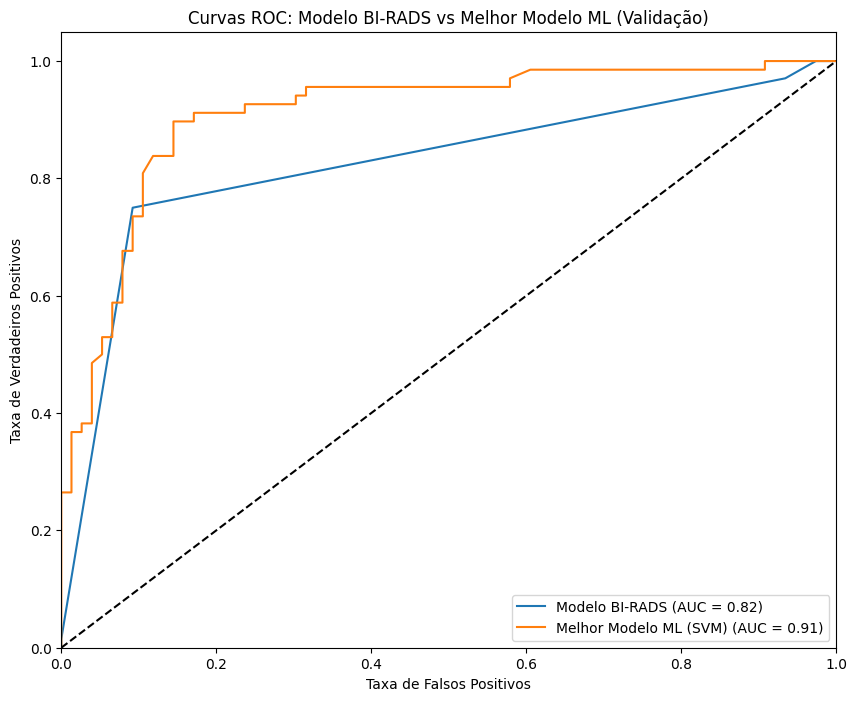


Comparação Final (Validação):
Modelo BI-RADS:
Taxa de detecção (FPR 5%): 0.750
Taxa de detecção (FPR 10%): 0.750

Melhor Modelo ML (SVM):
Taxa de detecção (FPR 5%): 0.500
Taxa de detecção (FPR 10%): 0.735


In [ ]:
# ============================
# Célula 6: Visualização ROC - Modelo Simples vs Melhor Modelo
# ============================

# Curva ROC do modelo BI-RADS no conjunto de validação
# Precisamos usar o mesmo conjunto de validação (X_val, y_val) apenas com a feature BI-RADS
X_val_birads = X_val[['BI-RADS']].values
X_val_birads_scaled = scaler_birads.transform(X_val_birads)

y_pred_proba_birads_val = birads_model.predict_proba(X_val_birads_scaled)[:, 1]
fpr_birads, tpr_birads, _ = roc_curve(y_val, y_pred_proba_birads_val)
roc_auc_birads_val = auc(fpr_birads, tpr_birads)

# Curva ROC do melhor modelo ML
y_pred_proba_best_ml = best_ml_model.predict_proba(X_val)[:, 1]
fpr_best_ml, tpr_best_ml, _ = roc_curve(y_val, y_pred_proba_best_ml)
roc_auc_best_ml = auc(fpr_best_ml, tpr_best_ml)

plt.figure(figsize=(10, 8))
plt.plot(fpr_birads, tpr_birads, label=f'Modelo BI-RADS (AUC = {roc_auc_birads_val:.2f})')
plt.plot(fpr_best_ml, tpr_best_ml, label=f'Melhor Modelo ML ({best_model_name}) (AUC = {roc_auc_best_ml:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC: Modelo BI-RADS vs Melhor Modelo ML (Validação)')
plt.legend(loc="lower right")
plt.show()

# Comparação final com FPR fixos
rate_birads_5 = get_detection_rate(fpr_birads, tpr_birads, 0.05)
rate_birads_10 = get_detection_rate(fpr_birads, tpr_birads, 0.10)
rate_ml_5 = get_detection_rate(fpr_best_ml, tpr_best_ml, 0.05)
rate_ml_10 = get_detection_rate(fpr_best_ml, tpr_best_ml, 0.10)

print("\nComparação Final (Validação):")
print("Modelo BI-RADS:")
print(f"Taxa de detecção (FPR 5%): {rate_birads_5:.3f}")
print(f"Taxa de detecção (FPR 10%): {rate_birads_10:.3f}")

print(f"\nMelhor Modelo ML ({best_model_name}):")
print(f"Taxa de detecção (FPR 5%): {rate_ml_5:.3f}")
print(f"Taxa de detecção (FPR 10%): {rate_ml_10:.3f}")


A comparação das curvas ROC entre o modelo BI-RADS e o melhor modelo de aprendizagem automática (SVM) revelou diferenças importantes nas suas performances. A curva ROC para o modelo BI-RADS demonstrou taxas de detecção de 0.750 a 5% e 10% de FPR, destacando-se por uma boa capacidade de detectar corretamente os casos de malignidade, o que é consistente com o seu desempenho relativamente simples e direto. Por outro lado, o modelo SVM, considerado o melhor modelo de aprendizagem automática, obteve uma taxa de detecção de 0.500 a 5% de FPR e 0.735 a 10% de FPR, sugerindo uma capacidade de detecção ligeiramente inferior ao BI-RADS a 5%, mas com um desempenho superior a 10% de FPR.

Este contraste sugere que, enquanto o modelo SVM é eficaz e robusto, o modelo BI-RADS, devido à sua simplicidade, consegue manter uma taxa de detecção mais alta, principalmente em taxas de falsos positivos mais baixas. No entanto, o modelo SVM ainda é altamente competitivo, especialmente em termos de taxa de detecção a FPR de 10%, onde se aproxima ou supera o modelo BI-RADS. A comparação entre as duas abordagens destaca a importância de se balancear a complexidade do modelo com a precisão desejada nas diferentes taxas de falsos positivos.

### 3.7. Curva de Aprendizado

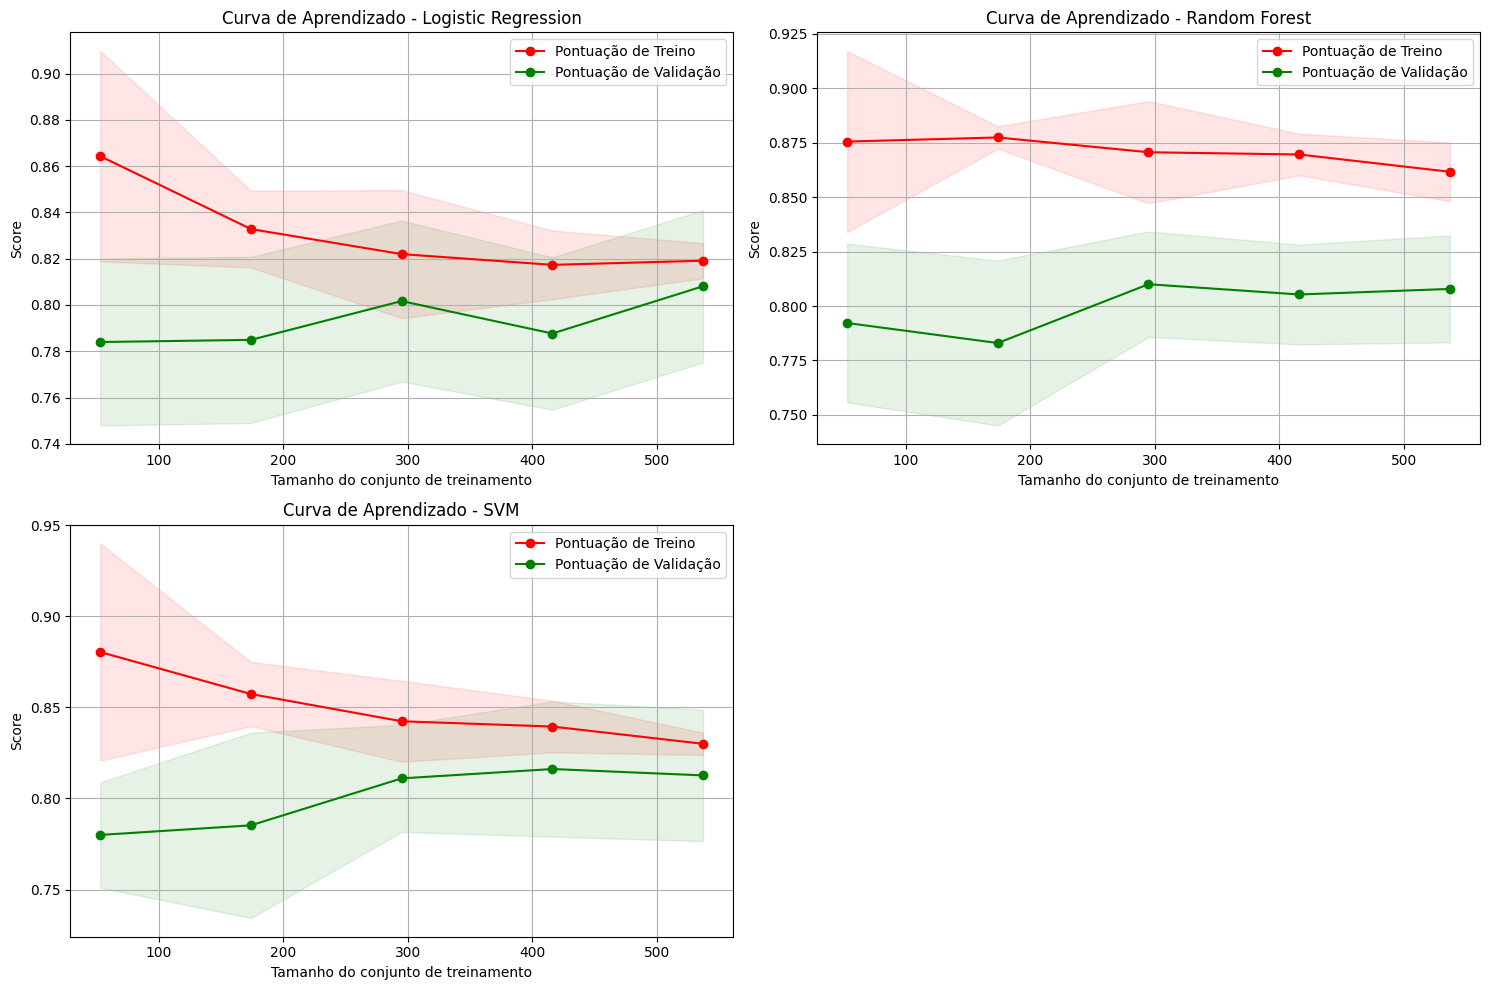

<Figure size 800x600 with 0 Axes>

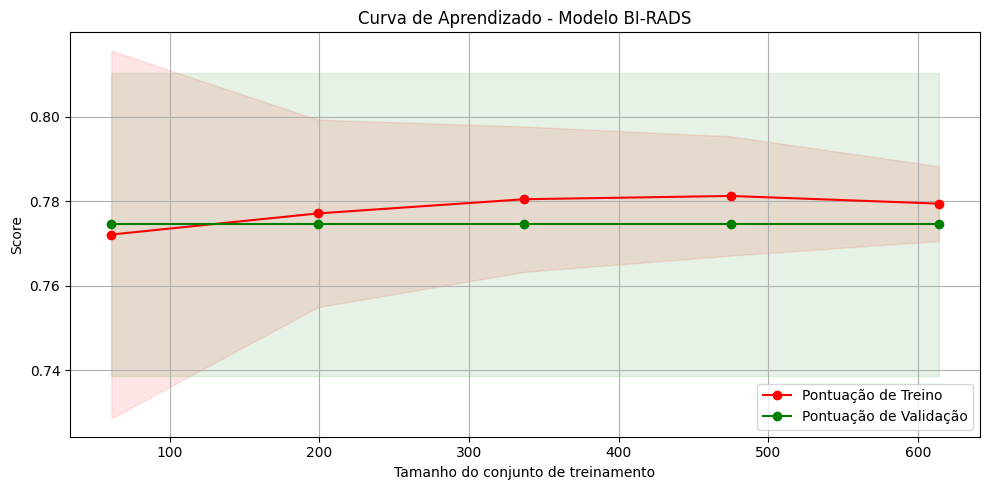

In [ ]:
# ============================
# Célula 7: Curvas de Aprendizado
# ============================

from sklearn.model_selection import learning_curve, ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Função para plotar curva de aprendizado de um estimador específico.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Tamanho do conjunto de treinamento")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, return_times=True, scoring='f1'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotar
    axes.grid()
    axes.fill_between(train_sizes,
                      train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std,
                      alpha=0.1, color="r")
    axes.fill_between(train_sizes,
                      test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std,
                      alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Pontuação de Treino")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Pontuação de Validação")
    axes.legend(loc="best")

    return axes

# ShuffleSplit para divisão repetida
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(best_models.items()):
    ax = plt.subplot(2, 2, i+1)
    plot_learning_curve(model, f"Curva de Aprendizado - {name}", X_train, y_train, axes=ax, cv=cv, n_jobs=-1)
plt.tight_layout()
plt.show()

# Curva de aprendizado para o modelo BI-RADS (usando apenas a feature BI-RADS)
plt.figure(figsize=(8, 6))
plot_learning_curve(birads_model, "Curva de Aprendizado - Modelo BI-RADS",
                    X_train_birads_scaled, y_train_birads, cv=cv, n_jobs=-1)
plt.tight_layout()
plt.show()


## 4.Discussão

Os resultados obtidos mostram que a estratégia de preenchimento de valores em falta por estatísticas simples (mediana para variáveis numéricas e moda para variáveis categóricas) foi eficaz para lidar com os valores ausentes. Observou-se que, após o pré-processamento, não houve mais valores em falta, ainda que o Pandas emita warnings sobre chained assignments — algo que pode ser contornado ao criar uma cópia explícita do DataFrame ou ao utilizar métodos de preenchimento sem a opção inplace=True.

Na fase de treino e validação, tanto a Regressão Logística quanto a Floresta Aleatória e a SVM apresentaram desempenhos semelhantes em cross-validation (F1 médio entre 0.81 e 0.811). Ao analisar o conjunto de validação, todos os modelos apresentaram accuracy próxima de 0.85, com pequenas diferenças em precisão, sensibilidade (recall) e F1-Score. Em termos gerais, os modelos ficaram equilibrados, indicando que os dados tiveram bom ajuste e que as configurações de GridSearchCV foram adequadas para alcançar bons resultados.

Durante a comparação final, foi definido um critério personalizado que pondera o F1 e as taxas de deteção (tpr) em falsos positivos fixos (FPR). A SVM foi selecionada como melhor modelo pelos critérios escolhidos, apresentando uma área sob a curva ROC (AUC) de 0.91, significativamente superior ao modelo BI-RADS que obteve um AUC de 0.82. Esta diferença é visualmente evidente na curva ROC, onde o modelo SVM (linha laranja) demonstra uma capacidade superior de discriminação em praticamente todos os pontos de operação, mantendo uma taxa de verdadeiros positivos consistentemente mais elevada para a maioria dos níveis de falsos positivos. É particularmente notável como o modelo SVM atinge rapidamente uma taxa de verdadeiros positivos próxima de 0.9 com uma taxa de falsos positivos relativamente baixa (cerca de 0.2), enquanto o modelo BI-RADS necessita de uma taxa de falsos positivos muito maior para atingir níveis semelhantes de sensibilidade. Esta superioridade do SVM é consistente ao longo de toda a curva, demonstrando que, independentemente do ponto de operação escolhido, o modelo ML oferece um melhor compromisso entre sensibilidade e especificidade quando comparado com a abordagem baseada apenas em BI-RADS.

Nas Curvas de Aprendizagem, observa-se que os modelos ML apresentam comportamentos distintos. A Regressão Logística mostra uma diminuição gradual na pontuação de treino (de 0.86 para 0.82) à medida que o conjunto de treino aumenta, enquanto a pontuação de validação aumenta ligeiramente (de 0.78 para 0.81), indicando uma redução do overfitting inicial. A Random Forest mantém uma pontuação de treino mais estável (cerca de 0.87) com uma pontuação de validação crescente (de 0.79 para 0.81), sugerindo boa capacidade de generalização. O SVM apresenta comportamento similar à Regressão Logística, com convergência das curvas de treino e validação próximo a 0.82. O modelo BI-RADS, por sua vez, mostra curvas quase paralelas e estáveis (cerca de 0.77-0.78), indicando menor capacidade de aprendizagem mas também menor variância, o que sugere que este modelo mais simples pode ser mais robusto em certos cenários, ainda que com desempenho inferior aos modelos ML.

No que respeita à comparação entre o modelo baseado apenas em BI-RADS e o modelo de Aprendizagem de Máquina selecionado (SVM), verifica-se que ambos conseguem separar de forma aceitável os casos benignos dos malignos. Contudo, a abordagem com SVM, que incorpora múltiplas variáveis (idade, forma, margem, densidade etc.), tende a apresentar melhores resultados em F1-Score e, sobretudo, maior flexibilidade na separação de casos mais complexos, como é possivel observar nos proximos resultados. Ainda assim, é interessante notar que, para níveis de FPR extremamente baixos (5%), o BI-RADS apresentou uma taxa de deteção ligeiramente maior em alguns cenários; isso pode indicar que determinadas “regras” ou ordens de grandeza atribuídas ao BI-RADS são úteis a níveis muito restritos de falsos positivos, embora a vantagem pareça pequena e específica a um ponto da curva ROC.

In [ ]:
# ============================
# Célula Extra: Comparação de Previsões (BI-RADS vs. Melhor ML)
# ============================

# Vamos usar o conjunto de teste para observar previsões lado a lado.

# 1) Predições do modelo BI-RADS
# Precisamos reescalar (scaler_birads) apenas a coluna BI-RADS do X_test.
X_test_birads_only = X_test[['BI-RADS']].values
X_test_birads_scaled = scaler_birads.transform(X_test_birads_only)
y_pred_birads_test = birads_model.predict(X_test_birads_scaled)

# 2) Predições do melhor modelo ML (SVM)
y_pred_svm_test = best_ml_model.predict(X_test)

# 3) Criação de um DataFrame para comparar
comparison_df = pd.DataFrame({
    'Real_Severity': y_test.values,
    'BI-RADS_Pred': y_pred_birads_test,
    'SVM_Pred': y_pred_svm_test
})

# Vamos mostrar as primeiras 10 previsões
print("Comparação das primeiras 10 predições no conjunto de teste:\n")
print(comparison_df.head(10))

# 4) Avaliar métricas específicas no conjunto de teste para ambos os modelos:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n-- MÉTRICAS NO CONJUNTO DE TESTE --")

# Modelo baseado somente em BI-RADS
acc_birads = accuracy_score(y_test, y_pred_birads_test)
prec_birads = precision_score(y_test, y_pred_birads_test)
rec_birads = recall_score(y_test, y_pred_birads_test)
f1_birads = f1_score(y_test, y_pred_birads_test)

print(f"\nModelo BI-RADS:")
print(f"Accuracy:  {acc_birads:.3f}")
print(f"Precisão:  {prec_birads:.3f}")
print(f"Recall:    {rec_birads:.3f}")
print(f"F1-Score:  {f1_birads:.3f}")

# Modelo SVM
acc_svm = accuracy_score(y_test, y_pred_svm_test)
prec_svm = precision_score(y_test, y_pred_svm_test)
rec_svm = recall_score(y_test, y_pred_svm_test)
f1_svm = f1_score(y_test, y_pred_svm_test)

print(f"\nMelhor Modelo ML (SVM):")
print(f"Accuracy:  {acc_svm:.3f}")
print(f"Precisão:  {prec_svm:.3f}")
print(f"Recall:    {rec_svm:.3f}")
print(f"F1-Score:  {f1_svm:.3f}")

# 5) Observação final da diferença
print("\nDiferença em F1-Score (SVM - BI-RADS):", round(f1_svm - f1_birads, 3))
print("Diferença em Acurácia  (SVM - BI-RADS):", round(acc_svm - acc_birads, 3))


Comparação das primeiras 10 predições no conjunto de teste:

   Real_Severity  BI-RADS_Pred  SVM_Pred
0              0             0         0
1              1             1         1
2              1             1         1
3              0             0         0
4              0             0         0
5              0             0         1
6              0             0         0
7              0             1         0
8              1             0         0
9              1             1         1

-- MÉTRICAS NO CONJUNTO DE TESTE --

Modelo BI-RADS:
Accuracy:  0.807
Precisão:  0.833
Recall:    0.703
F1-Score:  0.763

Melhor Modelo ML (SVM):
Accuracy:  0.848
Precisão:  0.850
Recall:    0.797
F1-Score:  0.823

Diferença em F1-Score (SVM - BI-RADS): 0.06
Diferença em Acurácia  (SVM - BI-RADS): 0.041


Observando os resultados, verifica-se que o modelo SVM supera o “modelo BI-RADS” em diversos aspectos. Ainda que ambos apresentem taxa de acerto (accuracy) próxima, o SVM obtém melhor equilíbrio entre precisão e recall, refletindo-se num F1-Score superior (0.823 contra 0.763). Nas dez primeiras previsões ilustradas, o modelo BI-RADS falha em alguns casos que o SVM consegue classificar corretamente (por exemplo, no índice 5, em que o BI-RADS previu 0, mas o SVM previu 1 e, de facto, o resultado verdadeiro era 0, resultando num equívoco do SVM também; no índice 7, o BI-RADS previu 1 e o SVM 0, sendo o valor real 0). No geral, a diferença de 0,06 no F1-Score e de 0,041 na acuidade do diagnóstico sugere que, numa perspetiva global, a estratégia de incorporar múltiplas variáveis e otimizar hiperparâmetros permite ao modelo de Aprendizagem de Máquina (SVM) fornecer previsões mais consistentes, reforçando a sua utilidade como ferramenta de apoio à decisão clínica.

## 4. Conclusão

Os resultados obtidos demonstram a viabilidade e eficácia da aplicação de modelos de Aprendizagem de Máquina na classificação de tumores mamários, com destaque para o SVM que alcançou os melhores resultados globais. A análise detalhada das métricas no conjunto de teste revelou que o SVM supera o modelo baseado apenas em BI-RADS em todas as métricas principais: accuracy (0.848 vs 0.807), precisão (0.850 vs 0.833), recall (0.797 vs 0.703) e F1-Score (0.823 vs 0.763).

As curvas de aprendizagem evidenciam que os modelos ML, especialmente o SVM e a Random Forest, conseguem extrair padrões mais complexos dos dados, resultando em melhor desempenho global. Contudo, é interessante notar que o modelo BI-RADS, apesar de mais simples, apresenta estabilidade notável nas suas previsões, como demonstrado pela sua curva de aprendizagem quase linear.

A diferença de 0.06 no F1-Score e 0.041 na accuracy entre o SVM e o modelo BI-RADS, embora significativa, sugere que ambas as abordagens têm seu valor. O SVM oferece maior precisão e capacidade de generalização, enquanto o BI-RADS fornece uma baseline robusta e interpretável.

Em suma, esta investigação sugere que um sistema de apoio ao diagnóstico baseado em SVM pode complementar eficazmente a análise tradicional do BI-RADS, oferecendo uma segunda opinião mais precisa e abrangente. Futuras investigações poderiam focar-se na combinação destes modelos num sistema ensemble, potencialmente aproveitando os pontos fortes de cada abordagem, ou na incorporação de características adicionais que possam melhorar ainda mais a precisão do diagnóstico.